<a href="https://colab.research.google.com/github/pushkarjain1009/Random-ML-Problems/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polynomial Regression

> __Polynomial Regression__ is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.

In [ ]:
# Importing files 

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_excel("/content/drive/My Drive/train.xlsx")
df = pd.DataFrame(data)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [ ]:
df = df.drop(["id", "date"], axis = 1)   # since Id and Date have no participation in 

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [ ]:
col = df.columns  # Getting the names of all columns

In [ ]:
# showing column wise %ge of NaN values they contains 

for i in col:
  print(i,"\t-\t", df[i].isna().mean()*100)


price 	-	 0.0
bedrooms 	-	 0.0
bathrooms 	-	 0.0
sqft_living 	-	 0.0
sqft_lot 	-	 0.0
floors 	-	 0.0
waterfront 	-	 0.0
view 	-	 0.0
condition 	-	 0.0
grade 	-	 0.0
sqft_above 	-	 0.0
sqft_basement 	-	 0.0
yr_built 	-	 0.0
yr_renovated 	-	 0.0
zipcode 	-	 0.0
lat 	-	 0.0
long 	-	 0.0
sqft_living15 	-	 0.0
sqft_lot15 	-	 0.0


> Since No columns have NaN values , now we can move further

> Now we have to the columns which are fairly distributed over the axis and can be used for prediction purpose and which are highly skewed.
> We can analyse that using Corelation Matrix(visualised using seaborn Heat Map)

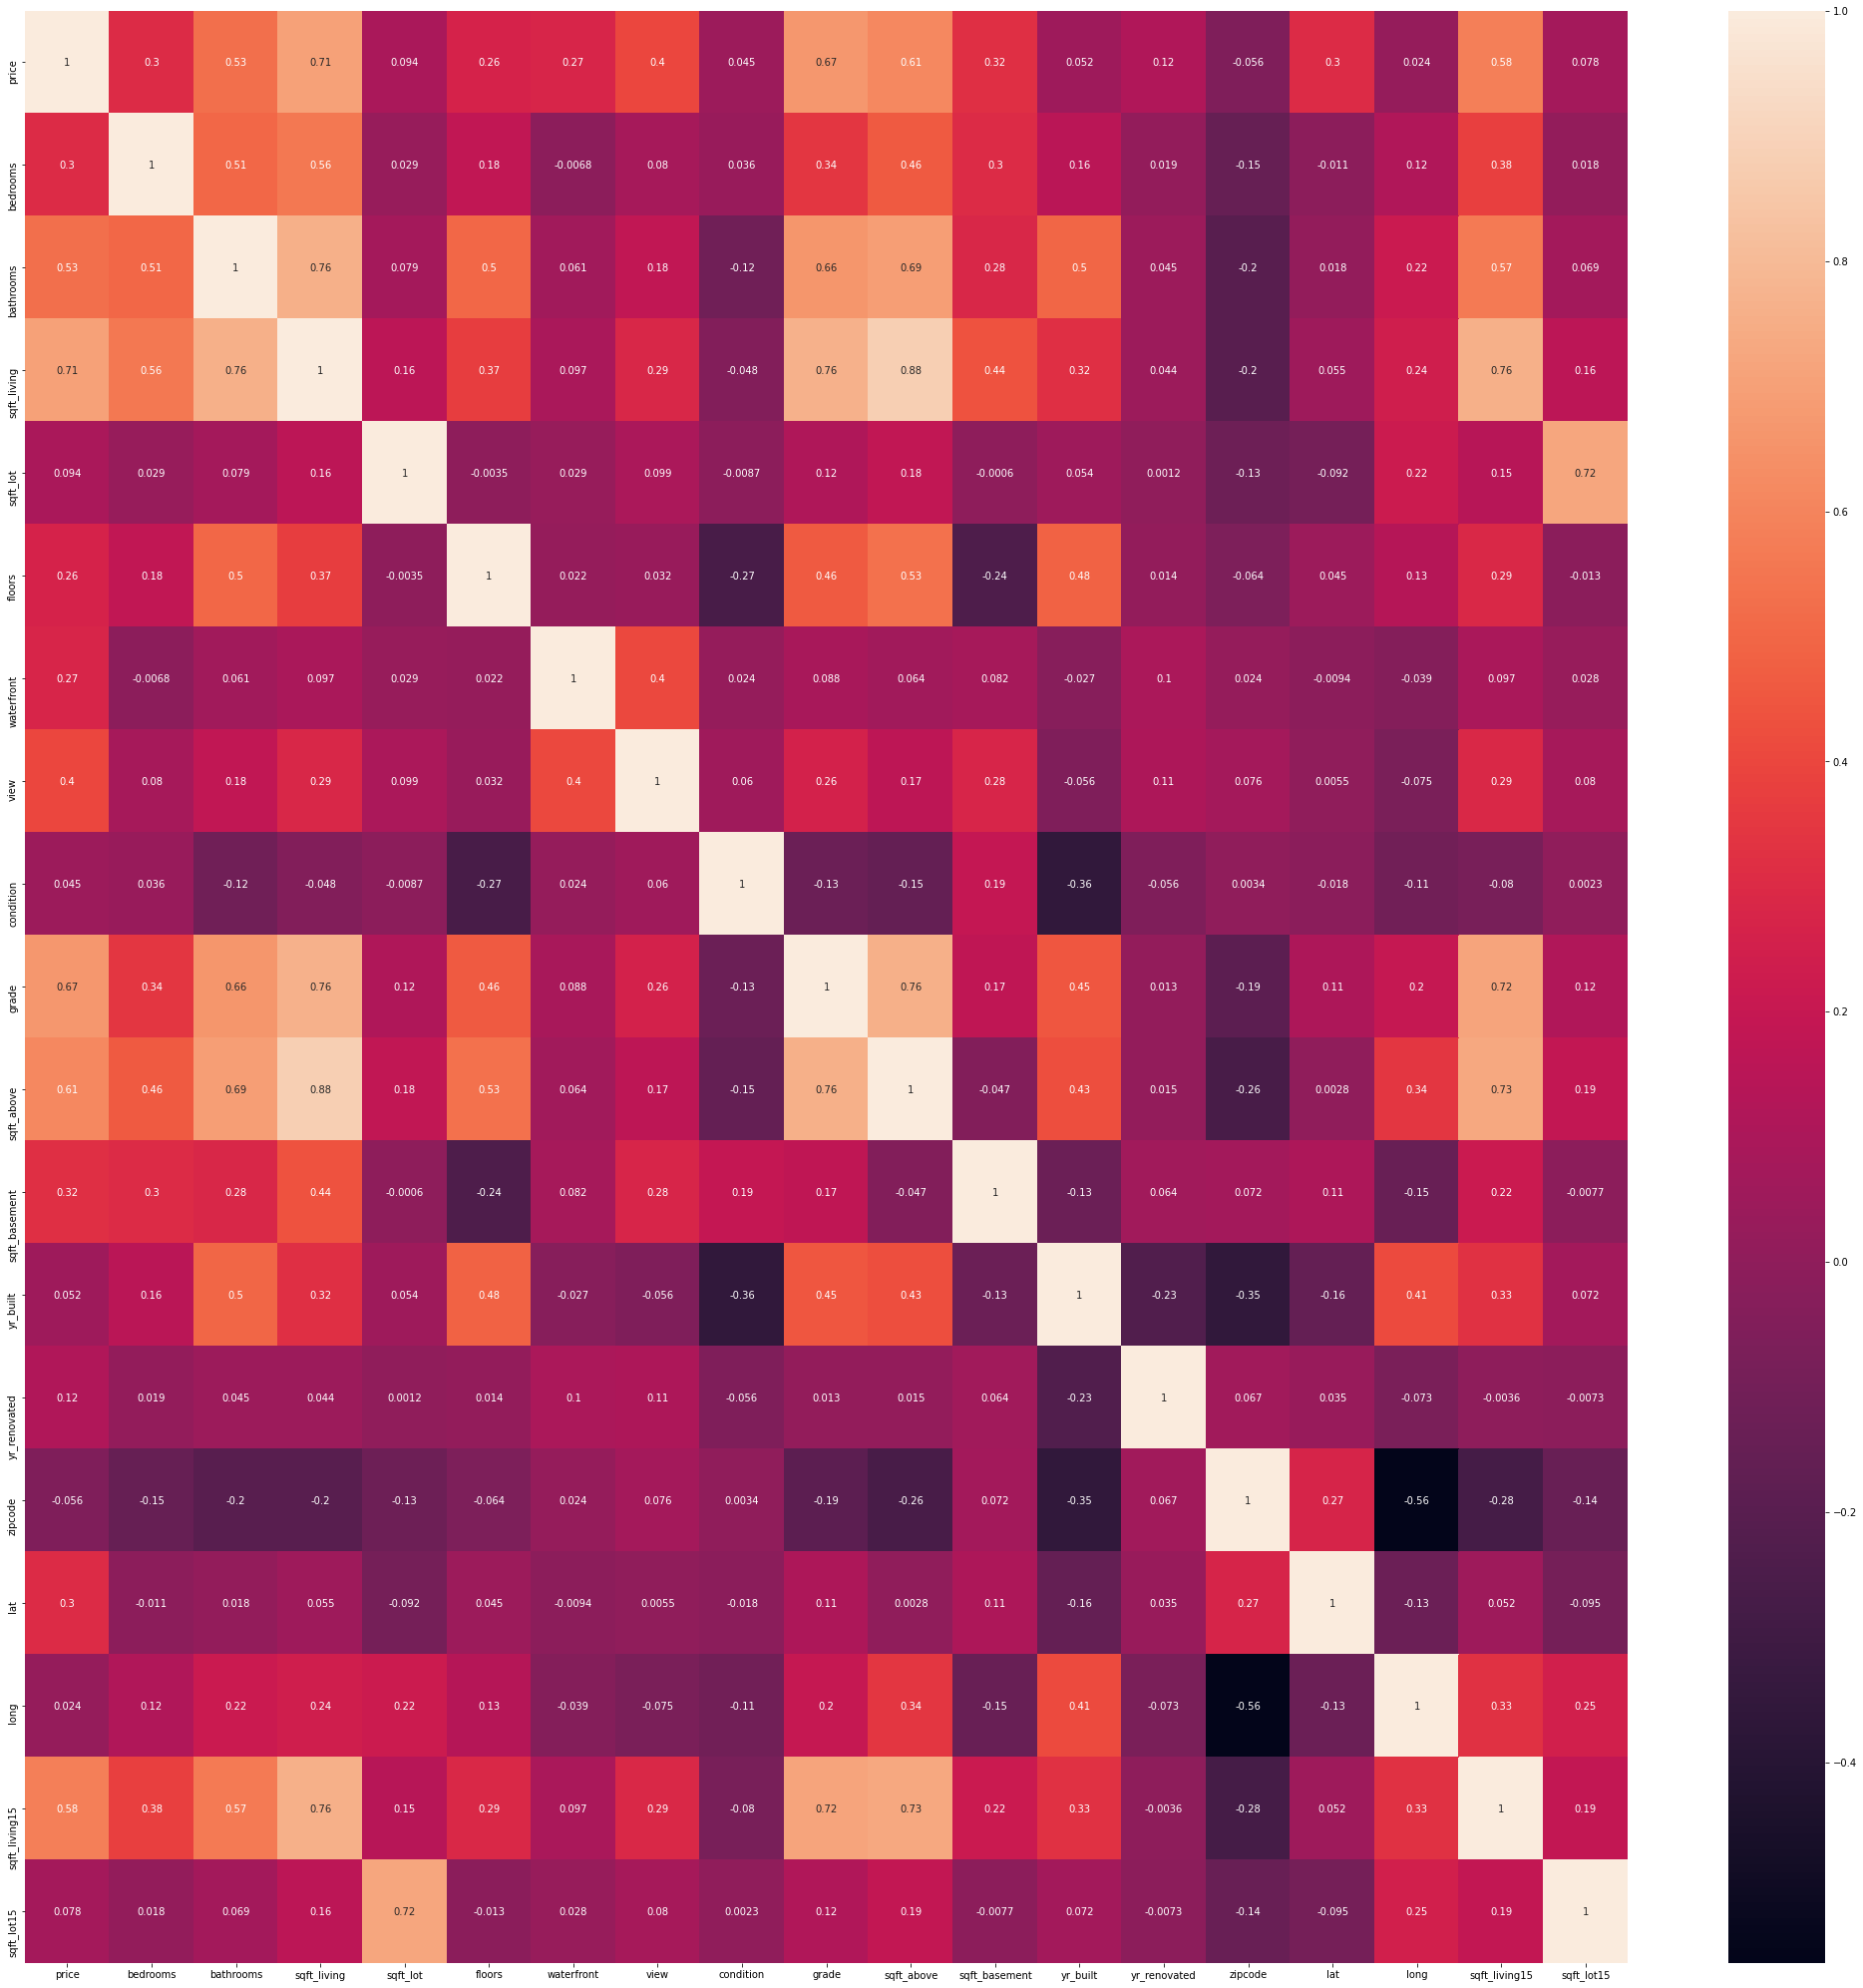

In [ ]:
cormat = df.corr()
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(cormat, annot = True)

In [ ]:
# Simple Function to get the name of top most corelated attributes

def get_corelated_col(cor_dat, threshold): 
  
  # Cor_data: column along which corelation to be measured 
  #Threshold: value above wich of corelation to considered

  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [ ]:
top_corelated_values = get_corelated_col(cormat['price'], 0.30)
top_corelated_values

,corr value
price,1.000000
bedrooms,0.300808
bathrooms,0.527532
sqft_living,0.705052
view,0.399658
grade,0.665567
sqft_above,0.611453
sqft_basement,0.322383
sqft_living15,0.584807


> So above mentioned Colums are best fit to use in prediction model

In [ ]:
X_train = df[top_corelated_values.index].drop(["price"], axis = 1)   
train_col = X_train.columns

X_train.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
0,4,3.00,1960,0,7,1050,910,1360
1,4,4.50,5420,0,11,3890,1530,4760
2,2,1.00,1160,0,7,860,300,1330
3,3,1.00,1430,0,7,1430,0,1780
4,3,1.75,1370,0,7,1370,0,1370


In [ ]:
Y_train = df["price"].values
Y_train[:5]

array([ 604000, 1225000,  468000,  310000,  400000])

#### Visualisation

> Now lets visualise the trends of price with respect to each columns 

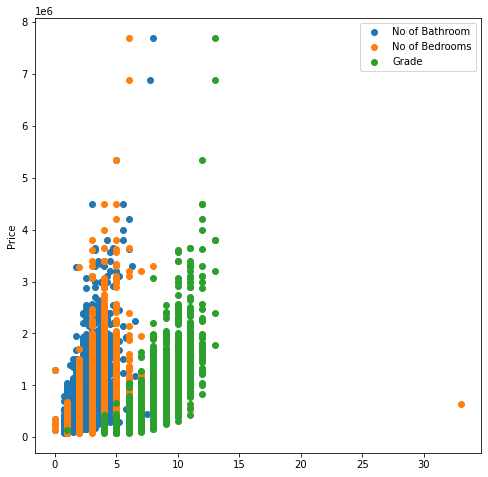

In [ ]:
# Here is a Scatter Plot of Bathrooms, Bedrooms and Grade  (All together as their values are comparable)

fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(X_train["bathrooms"], Y_train)
plt.scatter(X_train["bedrooms"], Y_train)
plt.scatter(X_train["grade"], Y_train)
plt.ylabel("Price")
plt.legend(("No of Bathroom", "No of Bedrooms", "Grade"), loc='upper right')
plt.show()

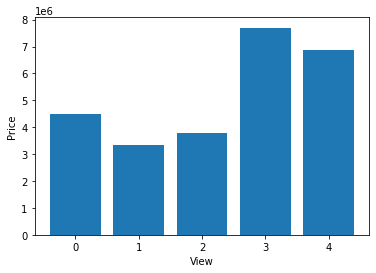

In [ ]:
# Here is Bar Graph of View wrt Price (Bar Graph is used as View seems to be categorical Data so bar graph is mre suited for visualisation )

plt.bar(X_train["view"],Y_train)
plt.xlabel("View")
plt.ylabel("Price")
plt.show()

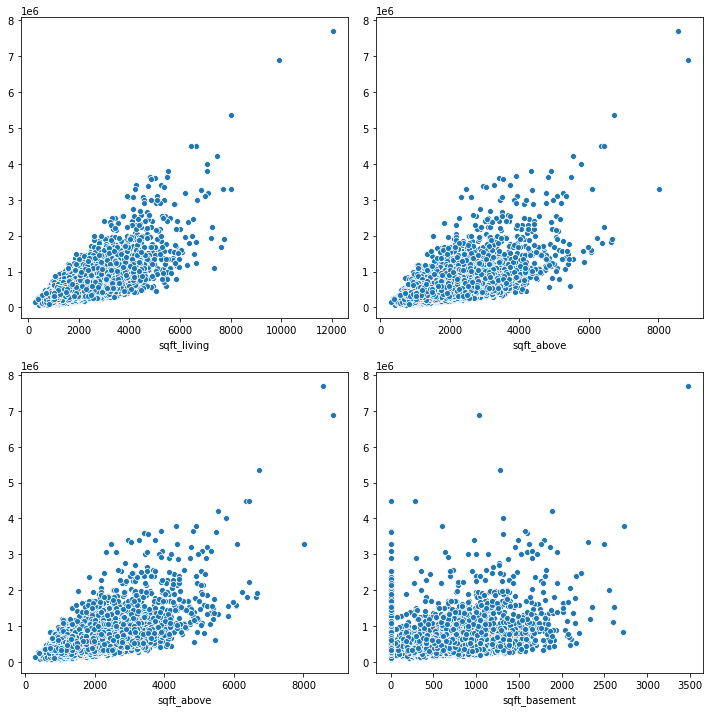

In [ ]:
# Here is a Scatter Plot of remaining columns  (All together as their values are comparable)


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))

plot_cols = ["sqft_living", "sqft_above", "sqft_basement", "sqft_living15"]

for i in range(2):
  for j in range(2):
    sns.scatterplot(x=X_train[plot_cols[i+j]], y=Y_train, ax = ax[i][j])

plt.tight_layout()

> Since range of data in different columns veries significantly we need to scale the data. For this we will use _Min-Max Scaling_.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=train_col)
X_train.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
0,0.121212,0.37500,0.142007,0.0,0.500000,0.088681,0.261494,0.143133
1,0.121212,0.56250,0.436224,0.0,0.833333,0.420070,0.439655,0.800774
2,0.060606,0.12500,0.073980,0.0,0.500000,0.066511,0.086207,0.137331
3,0.090909,0.12500,0.096939,0.0,0.500000,0.133022,0.000000,0.224371
4,0.090909,0.21875,0.091837,0.0,0.500000,0.126021,0.000000,0.145068


In [ ]:
# Fitting Polynomial Regression to the dataset 

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
  
poly = PolynomialFeatures(degree = 3)  # Degree is choosen on hit and trial basis.
model = LinearRegression()
model.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Importing test dataset I

test_data = pd.read_excel("/content/drive/My Drive/test.xlsx")
test_df = pd.DataFrame(data)

In [ ]:
# Extracting the required columns

X_test = test_df[top_corelated_values.index].drop(["price"], axis = 1)   
test_col = X_test.columns

X_test.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
0,4,3.00,1960,0,7,1050,910,1360
1,4,4.50,5420,0,11,3890,1530,4760
2,2,1.00,1160,0,7,860,300,1330
3,3,1.00,1430,0,7,1430,0,1780
4,3,1.75,1370,0,7,1370,0,1370


In [ ]:
Y_test = test_df["price"].values
Y_test[:5]

array([ 604000, 1225000,  468000,  310000,  400000])

In [ ]:
# Scaling the test data according to the values set by training data

X_test = pd.DataFrame(scaler.transform(X_test), columns=test_col)
X_test.head()

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,sqft_living15
0,0.121212,0.37500,0.142007,0.0,0.500000,0.088681,0.261494,0.143133
1,0.121212,0.56250,0.436224,0.0,0.833333,0.420070,0.439655,0.800774
2,0.060606,0.12500,0.073980,0.0,0.500000,0.066511,0.086207,0.137331
3,0.090909,0.12500,0.096939,0.0,0.500000,0.133022,0.000000,0.224371
4,0.090909,0.21875,0.091837,0.0,0.500000,0.126021,0.000000,0.145068


In [ ]:
# Predivting the Data

X_poly_test = poly.transform(X_test)
Y_predict = model.predict(X_poly_test)
Y_predict[:5]

array([ 406357.05966985, 1746381.6465063 ,  390620.70445339,
        396678.04514338,  332811.49975416])

In [ ]:
#Evaluating the Modelize

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print('R2 Value:', metrics.r2_score(Y_test, Y_predict))

Mean Absolute Error: 140565.41607466456
Mean Squared Error: 42822660222.405685
Root Mean Squared Error: 206936.36756840418
R2 Value: 0.7026750725465718


> Since value of R2 score is more closer to 1, our model is more accurately trained and is making pretty good predictions 